In [117]:
import pandas as pd
import numpy as np
from time import time
import logging
import pylab as pl
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import fetch_lfw_people  
from sklearn.decomposition import PCA  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.neural_network import MLPClassifier   
import os  
import cv2 

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):  
    """Helper function to plot a gallery of portraits."""  
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))  
    plt.subplots_adjust(bottom=0.01, left=0.01, right=0.99, top=0.90, hspace=0.35)  

    for i in range(n_row * n_col):  
        plt.subplot(n_row, n_col, i + 1)  
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)  
        plt.title(titles[i], size=12)  
        plt.xticks(())  
        plt.yticks(())  

    plt.show()  

In [119]:
faces = fetch_lfw_people(data_home="C:/Users/SUSHANT/OneDrive/Desktop/Project/dataset/dataset/faces", min_faces_per_person=90, resize=0.4)   

In [121]:
n_samples, h, w = faces.images.shape
np.random.seed(42)

x = faces.data
n_features = x.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print( "n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 1850
n_classes: 5


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Extracting the top 200 eigenfaces from 855 faces.


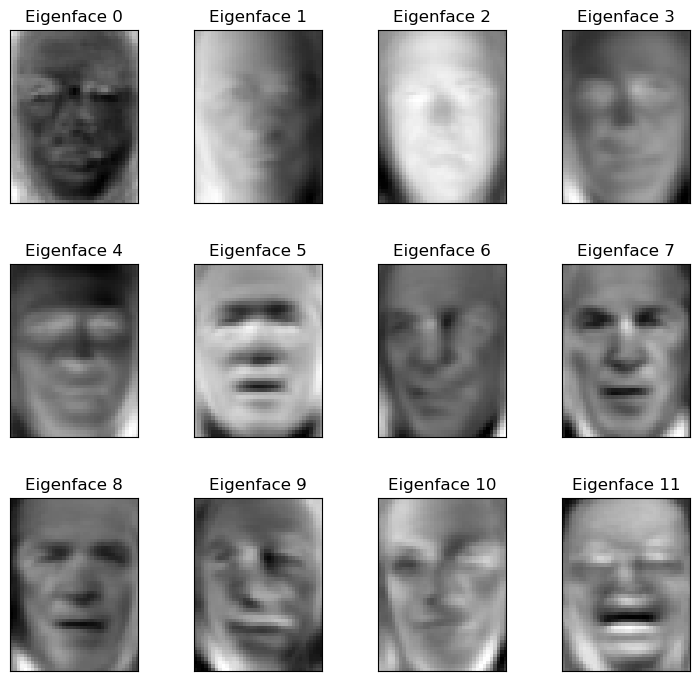

Projecting the input data on the eigenfaces orthonormal basis.
(855, 200) (285, 200)
Project done.


In [125]:
# Number of components for PCA  
n_components = 200

print("Extracting the top %d eigenfaces from %d faces." % (n_components, X_train.shape[0]))  

# Applying PCA  
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)  
pca.fit(X_train)  

# Generating eigenfaces  
eigenfaces = pca.components_.reshape(n_components, h, w)  

# Plot the gallery of the most significant eigenfaces  
eigenface_titles = ['Eigenface %d' % i for i in range(eigenfaces.shape[0])]  
plot_gallery(eigenfaces, eigenface_titles, h, w)  

plt.show()  

print("Projecting the input data on the eigenfaces orthonormal basis.")  

# Transform the training and test data  
X_train_pca = pca.transform(X_train)  
X_test_pca = pca.transform(X_test)  

print(X_train_pca.shape, X_test_pca.shape)  

# Compute Fisherfaces  
lda = LinearDiscriminantAnalysis()  
lda.fit(X_train_pca, Y_train)  

# Transform training and test data with LDA  
X_train_lda = lda.transform(X_train_pca)  
X_test_lda = lda.transform(X_test_pca)

print("Project done.")

In [127]:
# Initialize the MLPClassifier  
clf = MLPClassifier(random_state=42, hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)  

# Fit the model  
clf.fit(X_train_lda, Y_train)  

# Print model weights  
print("Model Weights:")  
model_info = [coef.shape for coef in clf.coefs_]  
print(model_info)  

Iteration 1, loss = 1.40324944
Iteration 2, loss = 1.06791654
Iteration 3, loss = 0.80647057
Iteration 4, loss = 0.60585778
Iteration 5, loss = 0.45762200
Iteration 6, loss = 0.35201886
Iteration 7, loss = 0.27858484
Iteration 8, loss = 0.23079913
Iteration 9, loss = 0.19868438
Iteration 10, loss = 0.17738857
Iteration 11, loss = 0.16277783
Iteration 12, loss = 0.15211001
Iteration 13, loss = 0.14485054
Iteration 14, loss = 0.13920263
Iteration 15, loss = 0.13436879
Iteration 16, loss = 0.13064644
Iteration 17, loss = 0.12734642
Iteration 18, loss = 0.12416119
Iteration 19, loss = 0.12218590
Iteration 20, loss = 0.11981235
Iteration 21, loss = 0.11787203
Iteration 22, loss = 0.11591968
Iteration 23, loss = 0.11450554
Iteration 24, loss = 0.11317088
Iteration 25, loss = 0.11138146
Iteration 26, loss = 0.11035257
Iteration 27, loss = 0.10871159
Iteration 28, loss = 0.10761820
Iteration 29, loss = 0.10626070
Iteration 30, loss = 0.10596719
Iteration 31, loss = 0.10429901
Iteration 32, los

Accuracy: 88.07%


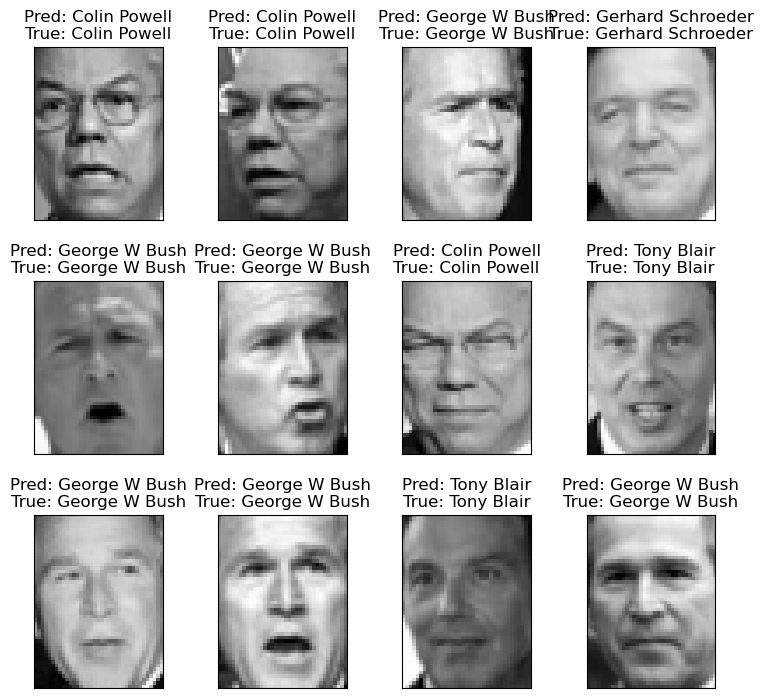

In [129]:
Y_pred = clf.predict(X_test_lda)
accuracy = (Y_pred == Y_test).mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot predictions
prediction_titles = [
    f"Pred: {target_names[Y_pred[i]]}\nTrue: {target_names[Y_test[i]]}"
    for i in range(len(Y_pred))
]
plot_gallery(X_test, prediction_titles, h, w)